## Importing The Standad Packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ridge_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

from keras import layers
from keras import models
from keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras

import warnings
warnings.filterwarnings('ignore')

## EDA

### Reading the Data

In [2]:
data = pd.read_csv('../Exercise 9/Absenteeism_at_work_AAA/Absenteeism_at_work.csv', sep = ';')
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


### Checkign The General Information About the Dataset

In [3]:
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


### Checking for missing Values

In [4]:
data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

### Dropping Unnecessary Columns and Changing the Dataypes of Appropriate Columns

In [5]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [6]:
data = data.drop('ID', axis = 1)
cats = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Disciplinary failure',
        'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']

for i in cats:
    data[i] = data[i].astype('category')

### Checking for Correlation in Variables

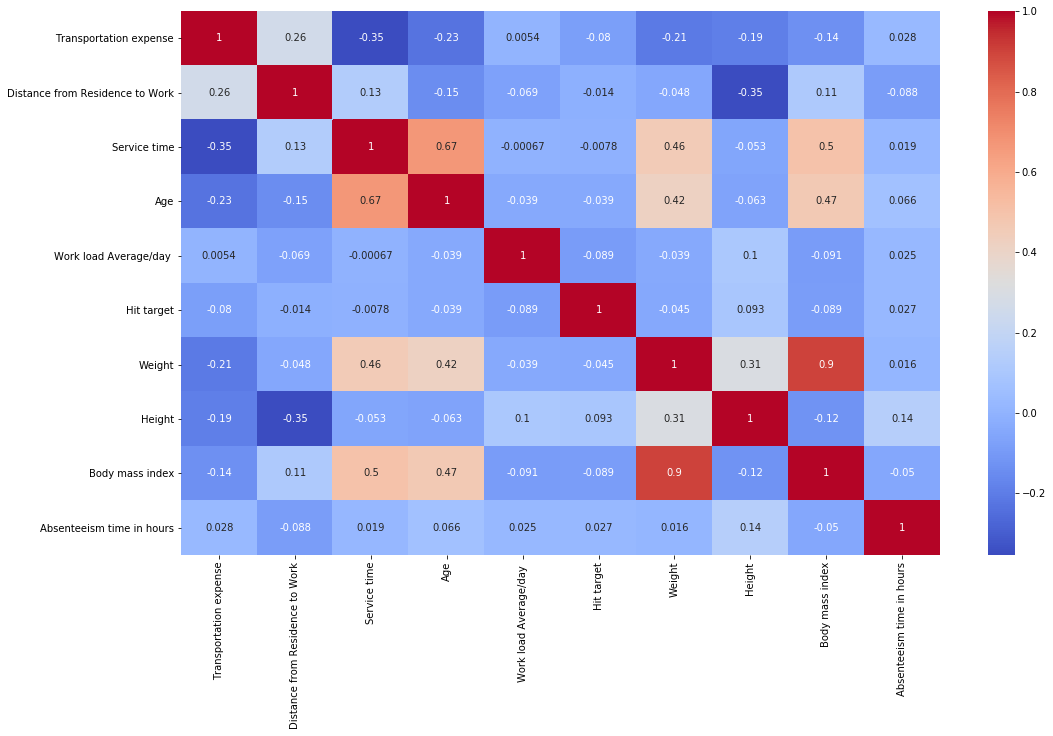

In [7]:
fig = plt.figure(figsize = (17, 10))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

## Building The Model

### Splitting The Data into Train and Test

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('Absenteeism time in hours', axis = 1), 
                                                    data['Absenteeism time in hours'], 
                                                   test_size = 0.3,
                                                   shuffle = True)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(518, 19) (222, 19)
(518,) (222,)


### Defining Models

In [9]:
lr = LinearRegression()
parameters = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X':[True, False]}

grid = GridSearchCV(lr, parameters, cv = 5)
random = RandomizedSearchCV(lr, parameters, cv = 5)

nn = models.Sequential()

### Trying Grid Search CV

In [10]:
grid.fit(x_train, y_train)
print('Best Score: ', grid.best_score_)

Best Score:  -0.009092019443620258


### Trying Random Search CV

In [11]:
random.fit(x_train, y_train)
print('Best Score: ', random.best_score_)

Best Score:  -0.009092019443620258


### Trying Neural Networks

In [12]:
nn.add(layers.Dense(512, activation = 'relu', input_shape = (19, )))
nn.add(layers.Dense(256, activation = 'relu'))
nn.add(layers.Dense(128))
nn.add(layers.LeakyReLU(alpha = 0.001))
nn.add(layers.Dense(1, activation = 'linear'))

nn.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'mean_squared_error')

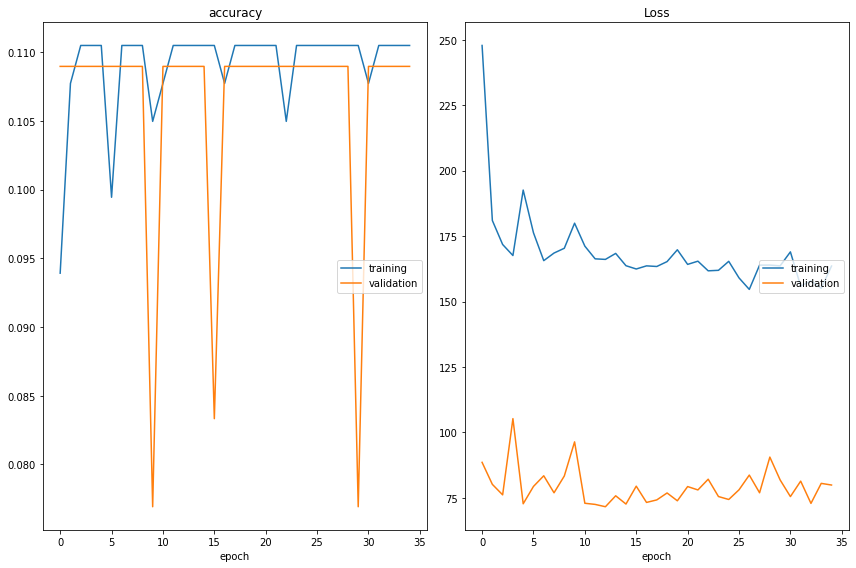

accuracy
	training         	 (min:    0.094, max:    0.110, cur:    0.110)
	validation       	 (min:    0.077, max:    0.109, cur:    0.109)
Loss
	training         	 (min:  154.622, max:  247.840, cur:  163.545)
	validation       	 (min:   71.573, max:  105.241, cur:   79.869)
19/19 [==============================] - 0s 23ms/step - loss: 163.5446 - accuracy: 0.1105 - val_loss: 79.8685 - val_accuracy: 0.1090
Epoch 00035: early stopping


In [13]:
es = EarlyStopping(monitor = 'val_accuracy', patience = 25, verbose = 1, mode = 'min')
callbacks = [es, PlotLossesKeras()]
nn.fit(x_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.3, callbacks = callbacks)